In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs

algo_names = ["Open_ES", "PGPE", "ARS", "Simple_GA", "CMA_ES", "Sep_CMA_ES"]

In [2]:
ant_lcurves = {}
for algo in algo_names:
    meta_log, hyper_log = load_result_logs(f"../experiments/{algo}/ant")
    best_id = hyper_log.filter(metric_name="test_perf_strat_mean", maximize_metric=True, top_k=1).run_id.tolist()[0]
    ant_lcurves[algo] = meta_log[best_id].stats.test_perf_strat_mean.mean

time_ant = meta_log.b_1_eval_0.time.num_gens

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [3]:
mnist_lcurves = {}
for algo in algo_names:
    meta_log, hyper_log = load_result_logs(f"../experiments/{algo}/mnist")
    best_id = hyper_log.filter(metric_name="test_perf_strat_mean", maximize_metric=True, top_k=1).run_id.tolist()[0]
    mnist_lcurves[algo] = meta_log[best_id].stats.test_perf_strat_mean.mean
time_mnist = meta_log.b_1_eval_0.time.num_gens

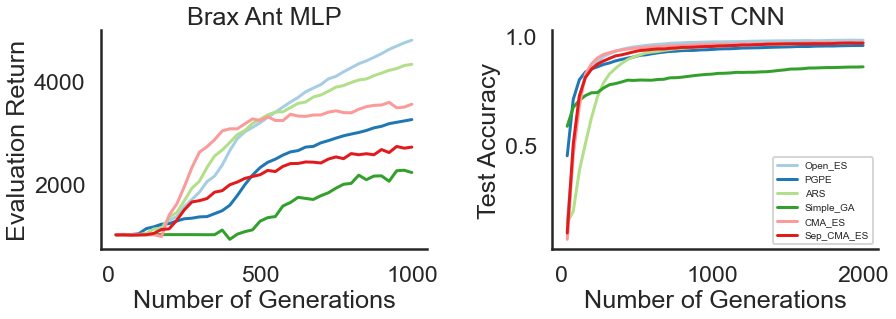

In [9]:
from mle_toolbox.visualize import *
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
for algo in algo_names:
    axs[0].plot(time_ant, ant_lcurves[algo])
    axs[1].plot(time_mnist, mnist_lcurves[algo], label=algo)
axs[1].legend(fontsize=10)
axs[0].set_xlabel("Number of Generations")
axs[1].set_xlabel("Number of Generations")
axs[0].set_ylabel("Evaluation Return")
axs[1].set_ylabel("Test Accuracy")
axs[0].set_title("Brax Ant MLP")
axs[1].set_title("MNIST CNN")

axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
fig.tight_layout()
fig.savefig("es_lcurves.png", dpi=300)